In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 13.5 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Input, MaxPooling2D
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import ModelCheckpoint
import plotly.express as px
from numpy import expand_dims
from keras.applications import InceptionV3

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset1/sign_mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset1/sign_mnist_test.csv")

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset1/sign_mnist_test.csv")
y = test['label']

In [ ]:
labele = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

In [ ]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [ ]:
x_train = train_df.values
x_test = test_df.values

In [ ]:
x_train_rgb_pom = x_train.reshape(-1,28,28,1)
x_test_rgb_pom = x_test.reshape(-1,28,28,1)

images = tf.convert_to_tensor(x_train_rgb_pom, dtype=tf.uint8)
x_train = tf.image.grayscale_to_rgb(images,name=None)

images1 = tf.convert_to_tensor(x_test_rgb_pom, dtype=tf.uint8)
x_test = tf.image.grayscale_to_rgb(images1,name=None)

In [ ]:
def plot_loss_accuracy(history):
  epochs = [i for i in range(20)]
  fig , ax = plt.subplots(1,2)
  train_acc = history.history['accuracy']
  train_loss = history.history['loss']
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']
  fig.set_size_inches(16,9)
  
  ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
  ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
  ax[0].set_title('Training & Validation Accuracy')
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")
  
  ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
  ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
  ax[1].set_title('Training & Validation Loss')
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")
  plt.show()

**Inception**

In [ ]:
x_train= tf.image.resize(x_train, [75, 75])
x_test = tf.image.resize(x_test, [75, 75])

In [ ]:
print(x_train.shape)
print(x_test.shape)

(27455, 75, 75, 3)
(7172, 75, 75, 3)


In [ ]:
datagen_train = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.20,
    preprocessing_function = tf.keras.applications.inception_v3.preprocess_input)
datagen_train.fit(x_train)

In [ ]:
x_test = tf.keras.applications.inception_v3.preprocess_input(x_test)

In [ ]:
conv_base = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(75,75,3))

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(24, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 24)                49176     
                                                                 
Total params: 21,851,960
Trainable params: 21,817,528
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
print('Number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False 
print('Number of trainable weights after freezing the conv base:', len(model.trainable_weights))

Number of trainable weights before freezing the conv base: 190
Number of trainable weights after freezing the conv base: 2


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 24)                49176     
                                                                 
Total params: 21,851,960
Trainable params: 49,176
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
path = '/content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_inception.hdf5'

save_callback = ModelCheckpoint(
  filepath=path,
  save_best_only=True,
  monitor="val_loss",
  verbose=1,
)

In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy', tfa.metrics.F1Score(num_classes=24),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
history = model.fit(datagen_train.flow(x_train,y_train, batch_size = 32, subset='training'), 
                                  validation_data=datagen_train.flow(x_train,y_train, batch_size = 8, subset='validation'), 
                                  epochs=20, verbose=1, callbacks=[save_callback])

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


687/687 [==============================] - ETA: 0s - loss: 0.7658 - accuracy: 0.7910 - f1_score: 0.7902 - precision: 0.9290 - recall: 0.6312
Epoch 1: val_loss improved from inf to 0.37601, saving model to /content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_inception.hdf5
687/687 [==============================] - 327s 465ms/step - loss: 0.7658 - accuracy: 0.7910 - f1_score: 0.7902 - precision: 0.9290 - recall: 0.6312 - val_loss: 0.3760 - val_accuracy: 0.9037 - val_f1_score: 0.9031 - val_precision: 0.9525 - val_recall: 0.8252
Epoch 2/20
687/687 [==============================] - ETA: 0s - loss: 0.2972 - accuracy: 0.9201 - f1_score: 0.9199 - precision: 0.9551 - recall: 0.8671
Epoch 2: val_loss improved from 0.37601 to 0.22398, saving model to /content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_inception.hdf5
687/687 [==============================] - 261s 380ms/step - loss: 0.2972 - accuracy: 0.9201 - f1_score: 0.9199 - precision: 0.9551 

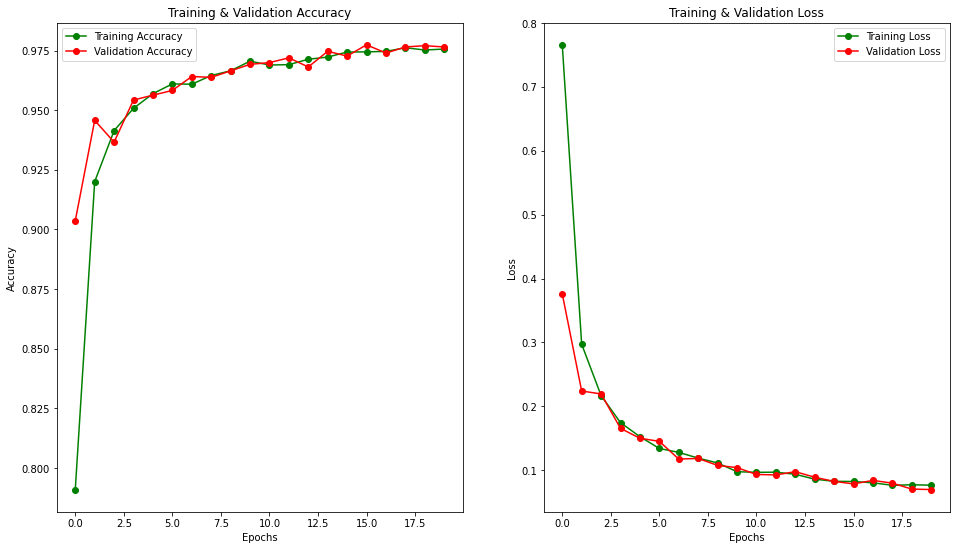

In [ ]:
plot_loss_accuracy(history)

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_inception.hdf5')

In [ ]:
model.evaluate(x_test,y_test)

225/225 [==============================] - 30s 131ms/step - loss: 0.1207 - accuracy: 0.9600 - f1_score: 0.9585 - precision: 0.9659 - recall: 0.9555


[0.12074161320924759,
 0.9599832892417908,
 array([1.        , 0.9976798 , 0.99676377, 0.9269311 , 0.98221344,
        1.        , 0.9405405 , 0.9443099 , 0.9828767 , 0.9862595 ,
        0.9650349 , 0.92079216, 0.89463955, 0.9959514 , 0.99856114,
        1.        , 0.9306931 , 0.85770756, 0.97319585, 0.9323017 ,
        0.9142053 , 0.93333334, 0.9489603 , 0.98033285], dtype=float32),
 0.9658914804458618,
 0.9555214643478394]

In [ ]:
x_train = tf.keras.applications.inception_v3.preprocess_input(x_train)
model.evaluate(x_train,y_train)

858/858 [==============================] - 112s 129ms/step - loss: 0.0236 - accuracy: 0.9937 - f1_score: 0.9937 - precision: 0.9949 - recall: 0.9928


[0.023556608706712723,
 0.9937351942062378,
 array([0.99201417, 0.99900895, 1.        , 0.99622965, 0.99422574,
        0.997099  , 0.99725276, 0.9980217 , 0.9974249 , 0.98969996,
        0.9971809 , 0.9704086 , 0.978166  , 0.9991645 , 1.        ,
        0.9996089 , 0.9861111 , 0.9882845 , 0.99704266, 0.98968184,
        0.9916511 , 0.996319  , 0.99785686, 0.9964254 ], dtype=float32),
 0.9948897361755371,
 0.9927517771720886]

In [ ]:
predict_x= model.predict(x_test) 
predictions=np.argmax(predict_x,axis=1)
print(predictions)

225/225 [==============================] - 23s 103ms/step
[6 5 9 ... 2 4 2]


In [ ]:
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1

In [ ]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      0.99      1.00       310
           3       0.95      0.91      0.93       245
           4       0.97      1.00      0.98       498
           5       1.00      1.00      1.00       247
           6       0.89      1.00      0.94       348
           7       1.00      0.89      0.94       436
           8       0.97      1.00      0.98       288
          10       1.00      0.98      0.99       331
          11       0.94      0.99      0.97       209
          12       0.90      0.94      0.92       394
          13       0.97      0.83      0.89       291
          14       0.99      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       0.89      0.98      0.93       144
          18       0.83    

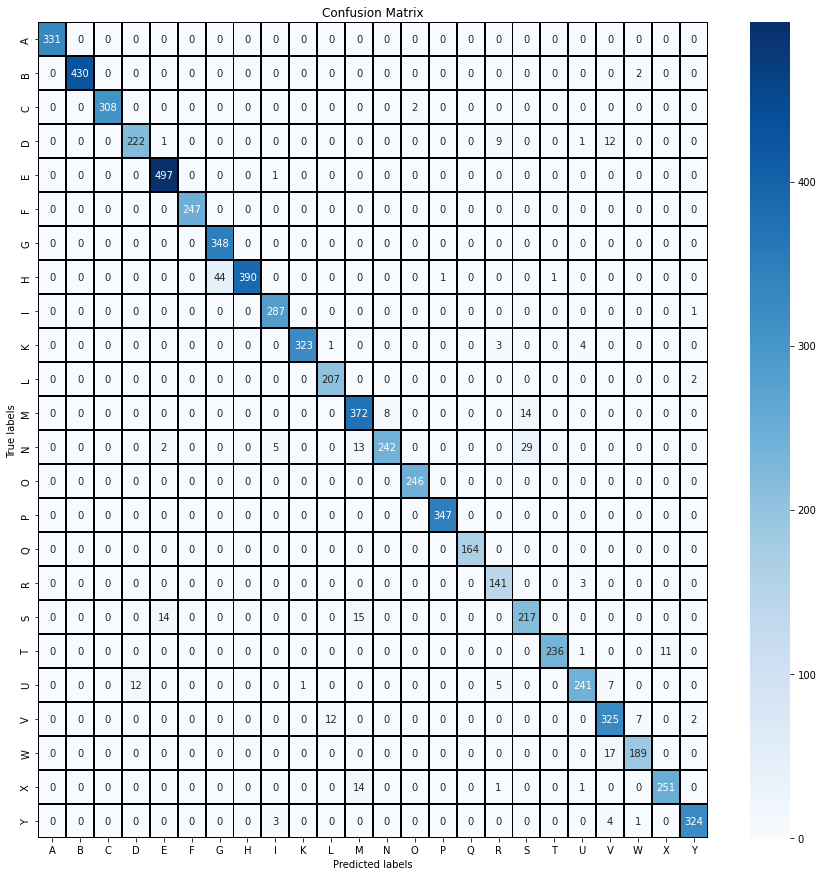

In [ ]:
cm = confusion_matrix(y,predictions)
cm = pd.DataFrame(cm, index = [i for i in range(25) if i!=9] , columns = [i for i in range(25) if i!=9])
plt.figure(figsize = (15,15))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labele); ax.yaxis.set_ticklabels(labele);